# pyVista plotting tests

07/03/20

## Basic tests
https://docs.pyvista.org/getting-started/installation.html#test-installation

Compilation failed:

TypeError: Symbol.asyncIterator is not defined.
    at __asyncValues (/home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:149:19)
    at /home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:168:36
    at Generator.next (<anonymous>:null:null)
    at /home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:144:75
    at new Promise (<anonymous>:null:null)
    at __awaiter (/home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:130:16)
    at read_stdin (/home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:162:16)
    at /home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages/bokeh/server/static/js/compiler.js:205:48
    at Generator.next (<anonymous>:null:null)
    at /home/femtolab/anaconda3/envs/epsdev/lib/python3.7/site-packages

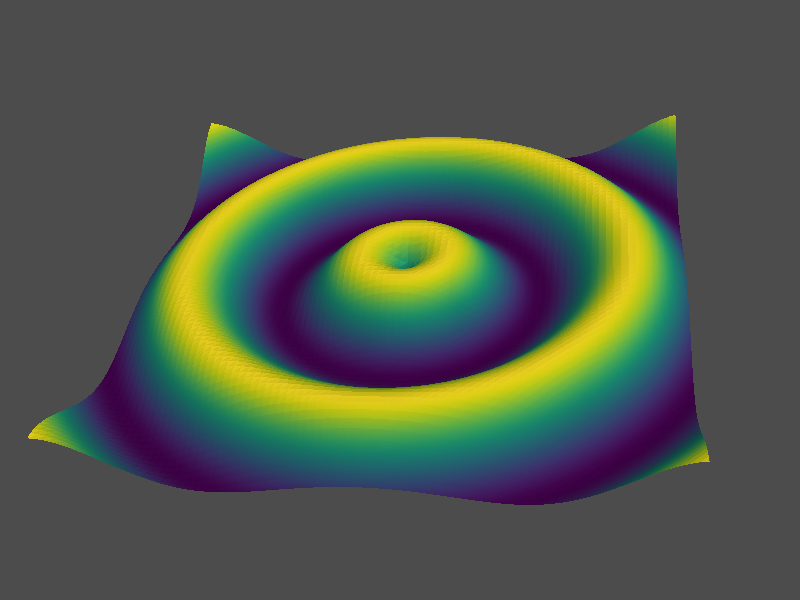

pyvista_ndarray([[-10.        , -10.        ,   0.9920974 ],
                 [-10.        ,  -9.75      ,   0.95490414],
                 [-10.        ,  -9.5       ,   0.88937362],
                 ...,
                 [  9.75      ,   9.25      ,   0.67616076],
                 [  9.75      ,   9.5       ,   0.79305773],
                 [  9.75      ,   9.75      ,   0.88729255]])

In [1]:
# Basic test code - throws errors in Notebook, probably ITK widgets related.
from pyvista import examples
examples.plot_wave()

In [2]:
from pyvista import examples

# list all examples
print(dir(examples))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'antfile', 'beam_example', 'channelsfile', 'delete_downloads', 'dir_path', 'download_action_figure', 'download_armadillo', 'download_bird', 'download_bird_texture', 'download_blood_vessels', 'download_blow', 'download_bolt_nut', 'download_brain', 'download_bunny', 'download_bunny_coarse', 'download_cad_model', 'download_cake_easy', 'download_cake_easy_texture', 'download_carburator', 'download_carotid', 'download_clown', 'download_coastlines', 'download_cow', 'download_cow_head', 'download_crater_imagery', 'download_crater_topo', 'download_damavand_volcano', 'download_disc_quads', 'download_dolfin', 'download_doorman', 'download_dragon', 'download_drill', 'download_emoji', 'download_emoji_texture', 'download_exodus', 'download_face', 'download_face2', 'download_faults', 'download_filled_contours', 'download_foot_bones', 'download_frog', 'download_gears', 'download_gour

## Notebook integration with ITK

See also http://localhost:8888/notebooks/github/ePSproc/epsproc/tests/plottingDev/ITK_tests_070320.ipynb

In [24]:
# 
# https://docs.pyvista.org/plotting/itk_plotting.html

import pyvista as pv

# create a mesh and identify some scalars you wish to plot
mesh = pv.Sphere()
z = mesh.points[:, 2]
mesh['z'] = mesh.points[:,2]

# Plot using the ITKplotter
pl = pv.PlotterITK()
# pl.add_mesh(mesh, scalars=z, smooth_shading=True)  # This gives an error as is, although as per webpage demo
#  RuntimeError: Data field (0.5) not supported.
# Line 62 in ~/anaconda3/envs/epsdev/lib/python3.7/site-packages/pyvista/plotting/itkplotter.py
pl.add_mesh(mesh, scalars='z', smooth_shading=True)  # Works if passed as a label to mesh[scalars], not values
# pl.add_mesh(mesh, smooth_shading=True)  # This works, but only graysale
pl.show(True)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [19]:
# Alternative form...
mesh['z'] = mesh.points[:,2]
# pl = pv.PlotterITK()
# pl.add_mesh(mesh, scalars=z, smooth_shading=True)  # This gives an error as is
# Plot using the ITKplotter
# pv.plot_itk(mesh, scalars=z)  # This has moved...?

In [20]:
mesh

PolyData (0x7fb26a95d9f0)
  N Cells:	1680
  N Points:	842
  X Bounds:	-4.993e-01, 4.993e-01
  Y Bounds:	-4.965e-01, 4.965e-01
  Z Bounds:	-5.000e-01, 5.000e-01
  N Arrays:	2

In [26]:
from itkwidgets import view
# view(mesh=mesh)
view(geometries=mesh)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [ ]:
examples

## Example function surface
https://stackoverflow.com/questions/6030098/how-to-display-a-3d-plot-of-a-3d-array-isosurface-in-matplotlib-mplot3d-or-simil

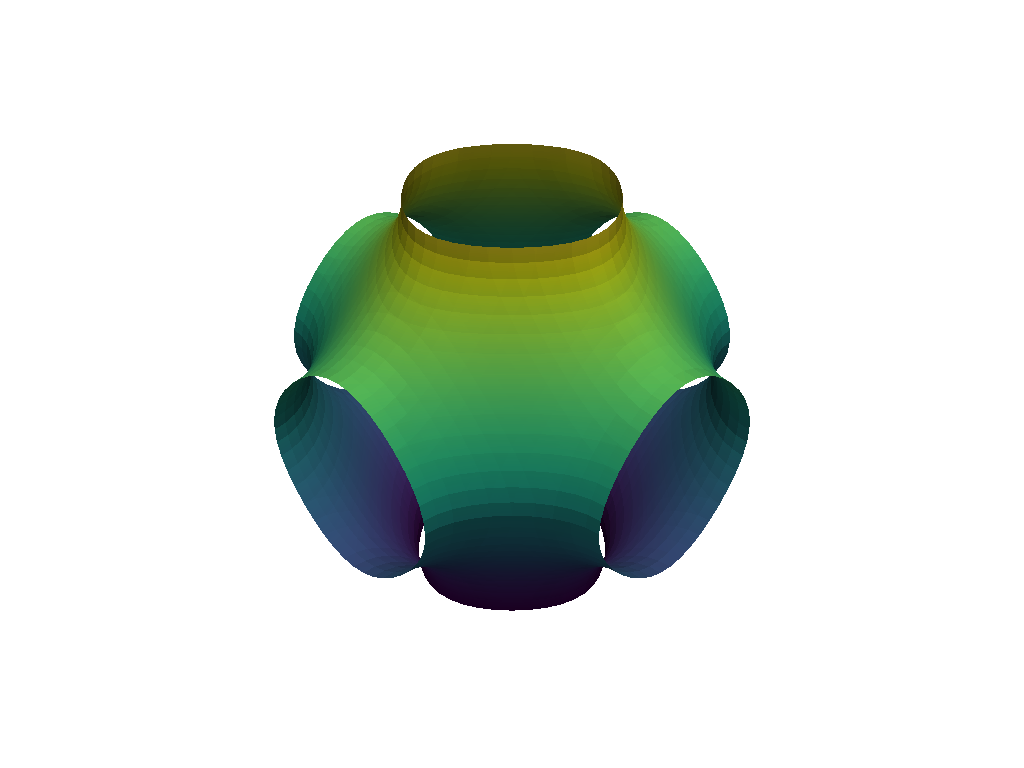

In [40]:
from numpy import cos, pi, mgrid
import pyvista as pv

#%% Data
x, y, z = pi*mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
vol = cos(x) + cos(y) + cos(z)
grid = pv.StructuredGrid(x, y, z)
grid["vol"] = vol.flatten()
# contours = grid.contour([0])  # Original example gives this, equivalent to isosurfaces = [0].
                                # Pass int for # of surfs, or list of surf values, here.
contours = grid.contour(isosurfaces = 3)  # Same result - it's a surface!

#%% Visualization
pv.set_plot_theme('document')
p = pv.Plotter()
p.add_mesh(contours, scalars=contours.points[:, 2], show_scalar_bar=False)
p.show()

In [32]:
grid

StructuredGrid (0x7fb26a8b41a0)
  N Cells:	27000
  N Points:	29791
  X Bounds:	-3.142e+00, 3.142e+00
  Y Bounds:	-3.142e+00, 3.142e+00
  Z Bounds:	-3.142e+00, 3.142e+00
  Dimensions:	31, 31, 31
  N Arrays:	1

In [37]:
?grid.contour

In [41]:
# Try interactive plot...
view(geometries=contours)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…